In [15]:
### it takes a cts CSV file and return a list of tuples ('CT_ID', 'title_interventions')
def extarct_substring(some_text, sub_text):
    idx = some_text.index(sub_text)
    return some_text[idx:]
     
def parse_clinical_trials(ct_file):
    index = 0
    clinical_trials_list = []
    cts = open(ct_file)
    cts.readline()
    for line in cts.readlines()[0:]:
        index += 1
        splits = line.split(',') 
        if len(splits) == 4:      
            nct_id = extarct_substring(splits[3], 'NCT')
            ct_record = (nct_id.strip(), splits[1] + ' ' +splits[2])  
            clinical_trials_list.append(ct_record)
    return clinical_trials_list

In [16]:
extarct_substring('https://ClinicalTrials.gov/show/NCT04707534', 'NCT')

'NCT04707534'

In [17]:
ct_list = parse_clinical_trials('covid19-search-trimmed-results-07052021.csv')

In [5]:
ct_list[0]

('NCT04707534', 'Dexamethasone for COVID-19 Drug: Dexamethasone')

In [18]:
import obonet

In [19]:
def load_obo_ontology(obo_file):    
    chebi_id_name = {}    
    graph = obonet.read_obo(obo_file)    
    for key, item in graph.nodes(data=True):
        chebi_id_name[key] = item['name'].strip(',').strip('\n').strip('.').strip('(').strip(')').lower()    
    return chebi_id_name

In [18]:
import itertool

ModuleNotFoundError: No module named 'itertool'

In [20]:
chebi_key_value = load_obo_ontology('chebi.obo')

In [21]:
chebi_key_value['CHEBI:30185']
def extract_entity_chebi_names(chebi_key_value):
    chebi_term_names = []
    for key in chebi_key_value.keys():
        chebi_term = chebi_key_value[key]
        chebi_term_names.append(chebi_term.lower())
    return chebi_term_names 

In [22]:
chebi_term_names = extract_entity_chebi_names(chebi_key_value)

In [23]:
chebi_term_names[10]

'sodium fluoride'

In [24]:
cts_counter = 0
exclude_list = ['role', 'drug', 'acid', 'application', 'solution', 'molecule', 'pharmaceutical', 'inhibitor', 'protein', 'food', 'group']
chebi_list_items = []

base_association_analysis = []
for ct_record in ct_list[0:]:
    cts_counter += 1
#     print('Reading NCT: ',  ct_record[0], ' number: ', cts_counter)    
    qualified_list_items = []
    for word in ct_record[1].split():
        clean_word = word.strip(',').strip().strip('.').strip('(').strip(')').lower()
        for key, value in chebi_key_value.items():
            if clean_word == value and clean_word not in exclude_list:
#                 qualified_obo_item = key.replace(':', '') + '_' + clean_word
                unqualified_obo_item = clean_word                
                obo_item = clean_word
                if unqualified_obo_item not in qualified_list_items:
                    qualified_list_items.append(unqualified_obo_item)
    if len(qualified_list_items) > 1:
#         print('Analyzing article ...')
        print(qualified_list_items)
        base_association_analysis.append(qualified_list_items)
#         print('\n\n-----------------------------------------------------------') 

['ivermectin', 'doxycycline']
['hydroxychloroquine', 'azithromycin', 'glucose']
['adjuvant', 'quercetin']
['clopidogrel', 'rivaroxaban', 'atorvastatin', 'omeprazole']
['ivermectin', 'hydroxychloroquine']
['tetracycline', 'hydrochloride']
['colchicine', 'monoterpene']
['clarithromycin', 'azithromycin']
['label', 'losartan']
['antagonist', 'proton']
['ivermectin', 'carrageenan']
['ivermectin', 'doxycycline']
['sofosbuvir', 'ledipasvir']
['bromhexine', 'vitamin', 'nac']
['doxycycline', 'rivaroxaban', 'hydroxychloroquine', 'azithromycin']
['emtricitabine', 'vitamin']
['beclomethasone', 'formoterol']
['metformin', 'naltrexone']
['ivermectin', 'doxycycline']
['hydroxychloroquine', 'azithromycin']
['home', 'emtricitabine']
['dexamethasone', 'adjuvant']
['chloroquine', 'phosphate']
['hydroxychloroquine', 'azithromycin']
['favipiravir', 'hydroxychloroquine']
['favipiravir', 'oseltamivir', 'adjuvant']
['amantadine', 'lactose']
['chlorhexidine', 'gluconate']
['hydroxychloroquine', 'azithromycin']

In [19]:
# pip install obonet


# Python program to demonstrate
# infinite iterators
   
# import itertools

In [26]:
len(base_association_analysis)

172

In [35]:
# base_occurrence_list = []
def construct_list_of_edges(list_input):
    list_of_edges = []
    for item in list_input:
        my_item = list(itertools.combinations(item, 2))
        for t_tuple in my_item:        
            list_of_edges.append(t_tuple)
    return list_of_edges
    
base_occurrence_list = construct_list_of_edges(base_association_analysis)    

In [36]:
# print(len(base_occurrence_list))
# asso_edges  = []
# for t_tuple in base_occurrence_list:
#     asso_edges.append((t_tuple[0][11:], t_tuple[1][11:]))

258


In [28]:
# pip install cairocffi

In [105]:
import networkx as nx
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import igraph as ig

import itertools
nct_drug_network = nx.Graph()

Name: 
Type: Graph
Number of nodes: 154
Number of edges: 193
Average degree:   2.5065


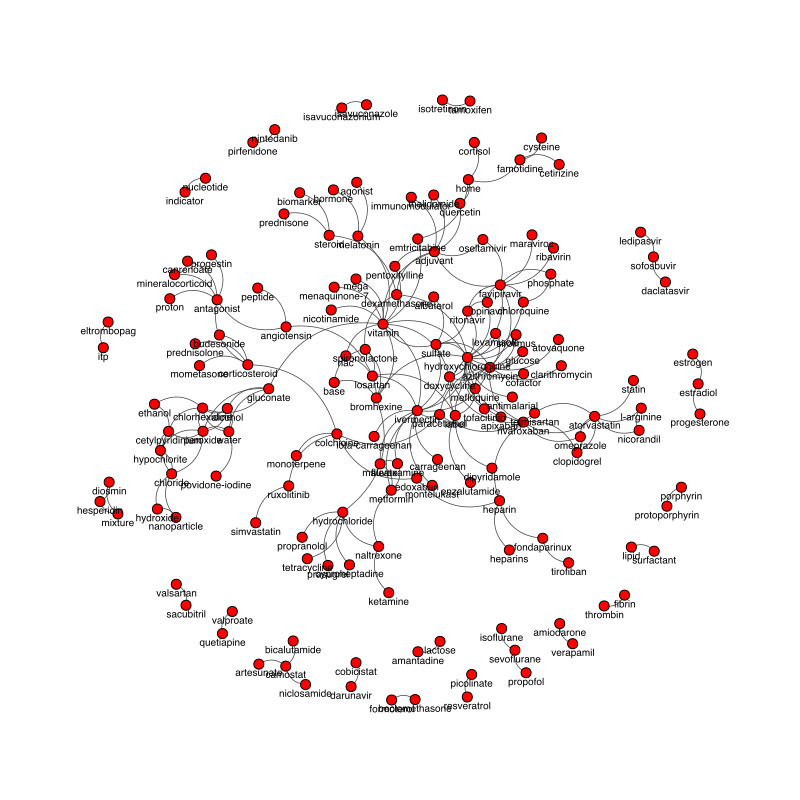

In [118]:
nct_drug_network.add_edges_from(base_occurrence_list)


### doing the igraph think ### 

igraph_nodes =  list(nct_drug_network.nodes())

# print("nodes: ",len(igraph_nodes))
# for node in igraph_nodes:
#     print(node)
edges = list(nct_drug_network.edges())

print(nx.info(nct_drug_network))



igraph_edges = []
for i in range(len(edges)):
    source_index = igraph_nodes.index(edges[i][0])
    target_index = igraph_nodes.index(edges[i][1])    
    igraph_edges.append((source_index, target_index))

# g = ig.Graph()
g = ig.Graph(igraph_edges)

g.vs["name"] = igraph_nodes
layout = g.layout("circular").rotate(90)#auto 
visual_style = {}
visual_style["vertex_size"] = 10
visual_style["vertex_color"] = ['green' if item.startswith('protein:') else 'red'  for item in g.vs["name"]]
visual_style["vertex_label"] = [item if item.startswith('protein:') else item  for item in g.vs["name"]]
visual_style["vertex_label_size"] = 10
visual_style["vertex_label_dist"] = 1
visual_style["vertex_shape"] = ['square' if item.startswith('protein:') else 'circle'  for item in g.vs["name"]]
visual_style["edge_width"] = .75
visual_style["layout"] = layout
visual_style["bbox"] = (800, 800)
visual_style["margin"] = 100
visual_style["edge_curved"] = True
ig.plot(g, "nct-networks.pdf" , **visual_style)

In [104]:
# print(g.edges())

In [33]:
lists_to_remove = ['CHEBI35209_label', 'CHEBI38068_antimalarial', 'CHEBI75830_home', 'CHEBI33229_vitamin',
                   'CHEBI22695_base', 'CHEBI33731_cluster', 'CHEBI24265_gluconate', 'CHEBI30879_alcohol',
                   'CHEBI24870_ion', 'CHEBI60809_adjuvant', 'CHEBI25741_oxide', 'CHEBI15377_water', 'CHEBI36976_nucleotide',
                   'CHEBI16670_peptide', 'CHEBI17716_lactose', 'CHEBI7421_nac','CHEBI16189_sulfate', 'CHEBI26020_phosphate', 
                  'CHEBI16236_ethanol', 'CHEBI60004_mixture', 'CHEBI50803_nanoparticle']
nct_drug_network.remove_nodes_from(lists_to_remove)


In [34]:
# ct-cliques_5_text.txt

def write_clique_to_file(clique_list, file_to_write):
    f_handle = open(file_to_write, 'a')
    for item in clique_list:
        f_handle.write(item)
        f_handle.write('|')
    f_handle.write('\n')
    

In [290]:
cliques = nx.find_cliques(nct_drug_network)

In [291]:
for c_clique in cliques:    
    if len(list(c_clique)) == 2:
        print(c_clique)
        write_clique_to_file(c_clique, '/Users/ahamed/Teaching/CS305A-SP21/clique-comp-algorithm/ct/ct-cliques_2_text.txt') 

['CHEBI63608_maraviroc', 'CHEBI134722_favipiravir']
['CHEBI59826_progestin', 'CHEBI48706_antagonist']
['CHEBI6970_mometasone', 'CHEBI50858_corticosteroid']
['CHEBI24505_heparins', 'CHEBI28304_heparin']
['CHEBI72291_cobicistat', 'CHEBI367163_darunavir']
['CHEBI28775_hesperidin', 'CHEBI4631_diosmin']
['CHEBI38184_picolinate', 'CHEBI27881_resveratrol']
['CHEBI85973_edoxaban', 'CHEBI28304_heparin']
['CHEBI85973_edoxaban', 'CHEBI23359_colchicine']
['CHEBI48706_antagonist', 'CHEBI48433_angiotensin']
['CHEBI48706_antagonist', 'CHEBI50858_corticosteroid']
['CHEBI48706_antagonist', 'CHEBI24636_proton']
['CHEBI16039_itp', 'CHEBI85010_eltrombopag']
['CHEBI87715_prasugrel', 'CHEBI36807_hydrochloride']
['CHEBI85089_ledipasvir', 'CHEBI85083_sofosbuvir']
['CHEBI35195_surfactant', 'CHEBI18059_lipid']
['CHEBI23965_estradiol', 'CHEBI17026_progesterone']
['CHEBI23965_estradiol', 'CHEBI50114_estrogen']
['CHEBI5054_fibrin', 'CHEBI9574_thrombin']
['CHEBI6015_isoflurane', 'CHEBI9130_sevoflurane']
['CHEBI1623